## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load database
df = pd.read_excel('Book.xlsx')

In [3]:
#import first 3 column.
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [4]:
#know how many columns and rows the dataframe.shape 
df.shape

(25, 2)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

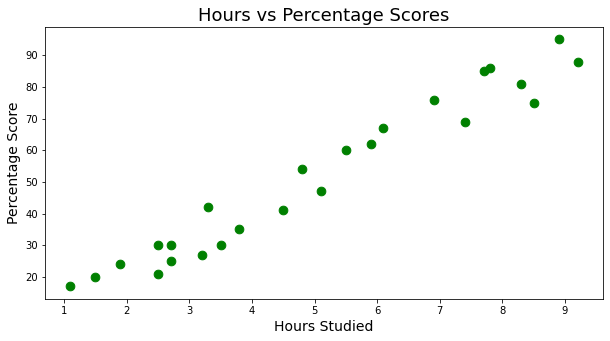

In [5]:
# Plotting the distribution of scores
plt.figure(figsize= (10, 5))
plt.title('Hours vs Percentage Scores', fontsize = 18)  
plt.xlabel('Hours Studied', fontsize = 14)  
plt.ylabel('Percentage Score', fontsize = 14)
plt.scatter(df.Hours, df.Scores, s=75, color='green')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
x = df.iloc[:,:-1].values  
y = df.iloc[:,1].values 
print(f'x: {x.shape}')
print(f'y: {y.shape}')

x: (25, 1)
y: (25,)


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


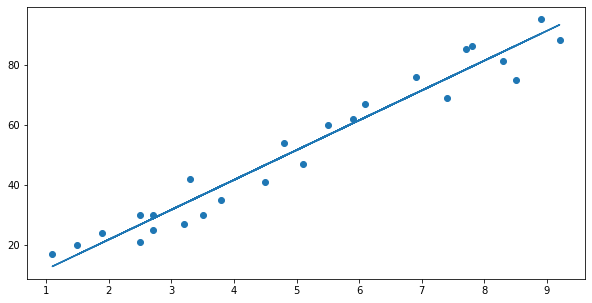

In [9]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.figure(figsize= (10, 5))
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# You can also test with your own data
hours = [[9.25]]
score = regressor.predict(hours)
print('hours =', hours)
print('Predicted Score =', score)

hours = [[9.25]]
Predicted Score = [93.69173249]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
